In [ ]:
import pandas as pd
from google.colab import files
import io
from IPython.display import Image
from google.colab import drive
import zipfile
import os
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import plotly.graph_objects as go


In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format .h5
import pickle # Required to save models in HDF5 format .pkl

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
# K.set_image_dim_ordering('tf')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.optimizers import SGD,RMSprop,adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
uploaded = files.upload()

Saving training_set.csv to training_set.csv


In [ ]:
df_train = pd.read_csv(io.BytesIO(uploaded['training_set.csv']))

In [ ]:
df_train 

PromotionId  ... bad
0     1NWLAzBwCUadj2dLNYVrTib3XuTL0T  ...   0
1     1NWLD3dp7tdq34WkgzQGLiPQM7dFC5  ...   0
2     1NWLCHgnVeBb2TIup13b1RSOLOl3Cq  ...   1
3     1NWLC9rEila7y7EyYKPp17zCMkjHs2  ...   1
4     1NWLCUe1qEBZtZEwInmjdBoce8XBF2  ...   0
...                              ...  ...  ..
2100  1NWL9v9ua9oLaFs779duFoI9ft0fga  ...   0
2101  1NWLBrPfc24ETTz9QzE8Ve51n6jigw  ...   0
2102  1NWLBCWHKnRCd94ttE5Ax5L1fYKaTE  ...   1
2103  1NWLCG2dgzDFbbPtmjzv4n1GyNgdnb  ...   1
2104  1NWLBEnU3EMnAZNhFyRQQj9WgmEuyy  ...   1

[2105 rows x 3 columns]

In [ ]:
uploaded = files.upload()

Saving training_images.zip to training_images.zip


In [ ]:
data = zipfile.ZipFile(io.BytesIO(uploaded['training_images.zip']), 'r')
# data = zipfile.ZipFile(io.BytesIO(uploaded['training_images_small_bash.zip']), 'r')
data.extractall()

In [ ]:
data.printdir()

File Name                                             Modified             Size
training_images/1NWL9mqJ9EuoEeuumxRY5osW1rhkSd.jpg 2018-10-11 16:14:36       103797
training_images/1NWL9n9fq7QQmxfWaL2j5avy4uRYFZ.jpg 2018-10-11 16:14:36       103797
training_images/1NWL9nELIqDjXfhLBeeMwOcqYzeint.jpg 2018-10-11 16:14:36       109755
training_images/1NWL9nGC5EGpxjYGBGNM4VOPebyoRu.jpg 2018-10-11 16:14:36       132023
training_images/1NWL9nLWSkUoRFGE6bSlBjYwFu9Bso.jpg 2018-10-11 16:14:36       136662
training_images/1NWL9nrkjrnSjNKc4Yd17I3qe2lStT.jpg 2018-10-11 16:14:36       169244
training_images/1NWL9ntnlPiyCrbKcyPhHADjimjntA.jpg 2018-10-11 16:14:36       136509
training_images/1NWL9nzJ9I7W9qHmmyWEdbK40q1lGp.jpg 2018-10-11 16:14:36        85527
training_images/1NWL9owEJYzAqyDLaPngVK2hHIZYvN.jpg 2018-10-11 16:14:36       122257
training_images/1NWL9p1IECxNJBLCetPgGAqwr2vwBo.jpg 2018-10-11 16:14:36       100214
training_images/1NWL9p2VmnBqB3ayasYPQEKtgyyyYs.jpg 2018-10-11 16:14:36        97

In [ ]:
train_data_dir = 'training_images/'
target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])

In [ ]:
print(' - # of trained samples: ', nb_train_samples)

 - # of trained samples:  2105


In [ ]:
# for k, v in uploaded.items():
#   open(k, 'wb').write(v)
# train_pic_list = list(uploaded.keys())

In [ ]:
# train_pic_list

['training_images.zip']

In [ ]:
im = Image.open(os.path.join('training_images/', '1NWLDLZYVdOlE80CDTBTeKgisLiaKe.jpg'))

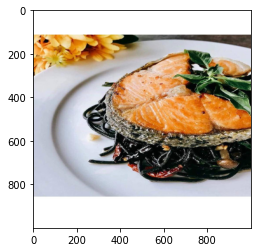

In [ ]:
plt.imshow(im)
plt.show()

In [ ]:
train_pic_list = os.listdir(train_data_dir)

In [ ]:
df_train['PromotionId'].head(5)

0    1NWLAzBwCUadj2dLNYVrTib3XuTL0T
1    1NWLD3dp7tdq34WkgzQGLiPQM7dFC5
2    1NWLCHgnVeBb2TIup13b1RSOLOl3Cq
3    1NWLC9rEila7y7EyYKPp17zCMkjHs2
4    1NWLCUe1qEBZtZEwInmjdBoce8XBF2
Name: PromotionId, dtype: object

In [ ]:
df_train['Pic'] = df_train['PromotionId']+'.jpg'

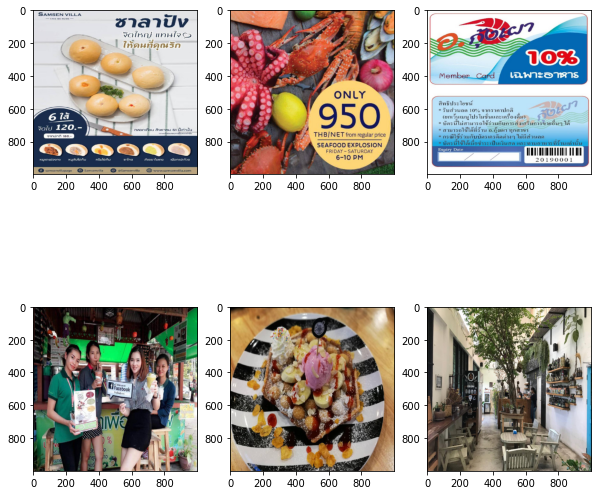

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
df_train['Pic'] = df_train['PromotionId']+'.jpg'
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

for imag in df_train['Pic']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    img = Image.open(os.path.join(train_data_dir, imag))
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

In [ ]:
###balanced สัสๆๆ
df_train.groupby(['bad'])['bad'].count()

bad
0    1061
1    1044
Name: bad, dtype: int64

In [ ]:
df_train.head(10)

PromotionId  ...                                 Pic
0  1NWLAzBwCUadj2dLNYVrTib3XuTL0T  ...  1NWLAzBwCUadj2dLNYVrTib3XuTL0T.jpg
1  1NWLD3dp7tdq34WkgzQGLiPQM7dFC5  ...  1NWLD3dp7tdq34WkgzQGLiPQM7dFC5.jpg
2  1NWLCHgnVeBb2TIup13b1RSOLOl3Cq  ...  1NWLCHgnVeBb2TIup13b1RSOLOl3Cq.jpg
3  1NWLC9rEila7y7EyYKPp17zCMkjHs2  ...  1NWLC9rEila7y7EyYKPp17zCMkjHs2.jpg
4  1NWLCUe1qEBZtZEwInmjdBoce8XBF2  ...  1NWLCUe1qEBZtZEwInmjdBoce8XBF2.jpg
5  1NWLC9g0nfGqwDLV0jzcb8Q6Ys3ZBT  ...  1NWLC9g0nfGqwDLV0jzcb8Q6Ys3ZBT.jpg
6  1NWLAyIft6FUB8MT4aK0IKjLsaN70y  ...  1NWLAyIft6FUB8MT4aK0IKjLsaN70y.jpg
7  1NWLBEnYhTJOdIuQCdW8RgVh5yXBDZ  ...  1NWLBEnYhTJOdIuQCdW8RgVh5yXBDZ.jpg
8  1NWLDLTHIVeRaUZVvLobx8BeU4nrw1  ...  1NWLDLTHIVeRaUZVvLobx8BeU4nrw1.jpg
9  1NWLCTNe0amJfILF8cozH9UUZEEmfR  ...  1NWLCTNe0amJfILF8cozH9UUZEEmfR.jpg

[10 rows x 4 columns]

In [ ]:
Is_bad_list = []

for i in train_pic_list :
  for j in range(0,len(df_train)):
    if i == df_train['Pic'][j]:
      Is_bad_list.append(df_train['bad'][j])

print(Is_bad_list)
print(len(Is_bad_list))

[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 

In [ ]:
#### make pic folder group by is_bad or not

###create 1/0 folder
import os
from shutil import copyfile
os.mkdir('train/')

os.mkdir('test/')

os.mkdir('val/')


for class_ in df_train['bad'].unique():
  os.mkdir('train/'+str(class_)+'/')
  os.mkdir('test/'+str(class_)+'/')
  os.mkdir('val/'+str(class_)+'/')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train['bad'], test_size=0.15, stratify= df_train['bad'])

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.15,stratify= y_train)


In [ ]:
len(X_val)

269

In [ ]:
len(y_test)

316

In [ ]:
#####ต้องแก้ image ตรงนี้ เพราะเป็นแค่ชื่อ ไม่ใช่ image จริง
from shutil import copyfile, copy2

for image,type_  in zip(X_train['Pic'], y_train):
    image_file = os.path.join(train_data_dir, image)
    copy2(image_file, 'train/'+str(type_))

for image,type_ in zip(X_val['Pic'], y_val):
    image_file = os.path.join(train_data_dir, image)
    copy2(image_file, 'val/'+ str(type_))

for image,type_ in zip(X_test['Pic'], y_test):
    image_file = os.path.join(train_data_dir, image)
    copy2(image_file, 'test/'+str(type_) )


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

train = datagen.flow_from_directory('train/')

test = datagen.flow_from_directory('test/')

val = datagen.flow_from_directory('val/')


Found 1520 images belonging to 2 classes.
Found 316 images belonging to 2 classes.
Found 269 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
from keras.preprocessing.image import ImageDataGenerator

def build():
    model = Sequential()
    IMAGE_WIDTH = 256
    IMAGE_HEIGHT = 256
    IMAGE_CHANNELS = 3
    model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) 

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    model.summary()
    return model
# model = build()
# history = model.fit_generator(train, epochs=22, validation_data=val)

In [ ]:
predict = model.predict_generator(test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [ ]:

fig = go.Figure()
epochs = []
for i in range(len(history.history['acc'])):
    epochs.append(i)
fig.add_trace(go.Scatter(x=epochs,y=history.history['acc'], mode='lines',name='train'))
fig.add_trace(go.Scatter(x=epochs,y=history.history['val_acc'], mode='lines',name='val'))
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'width': 500, 
        'height': 400

})
fig.show()

In [ ]:
##val 0.15 , epoch 20, drop out 0.4
from sklearn.metrics import classification_report
import numpy as np

predict_frame = pd.DataFrame([])
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())  ##if error use val_1
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category'].astype(int) ))


              precision    recall  f1-score   support

           0       0.53      0.69      0.60       159
           1       0.55      0.38      0.45       157

    accuracy                           0.54       316
   macro avg       0.54      0.54      0.53       316
weighted avg       0.54      0.54      0.53       316



In [ ]:
#val = 0.15, drop out 0.45, epoch 18

from sklearn.metrics import classification_report
import numpy as np

predict_frame = pd.DataFrame([])
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())  ##if error use val_1
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category'].astype(int) ))

              precision    recall  f1-score   support

           0       0.53      0.36      0.43       159
           1       0.51      0.67      0.58       157

    accuracy                           0.52       316
   macro avg       0.52      0.52      0.50       316
weighted avg       0.52      0.52      0.50       316



In [ ]:
####สาเหตุที่ ACC ต่ำเพราะ ภาพที่ไม่ใช่โปรโมชันมีความหลากหลาย ที้ง คน, ร้าน, เหล้า, เบียร์ , screen shot

In [ ]:
def show_wrong_classification(y_test, predict, df_train):
    tmp = df_train[df_train.index.isin(y_test.index)]
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
    i=0
    for imag, true, pred in zip(tmp['Pic'], tmp['bad'], predict):
        if true!=pred:
            if i < 5:
                img = Image.open(os.path.join(train_data_dir, imag))
                fig = plt.figure()
                ax[i].imshow(img)
                ax[i].set_title(str(pred))
                i+=1


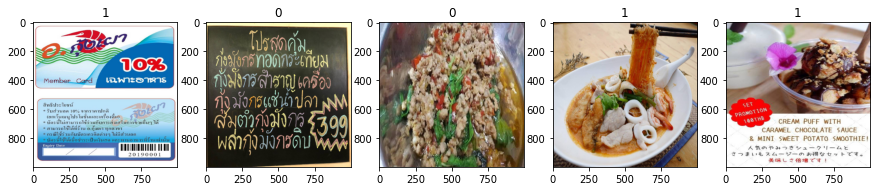

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
from PIL import Image
show_wrong_classification(y_test, predict_frame['category'], df_train)

In [ ]:
###Color exploration

In [ ]:
df_train['bad']

0       0
1       0
2       1
3       1
4       0
       ..
2100    0
2101    0
2102    1
2103    1
2104    1
Name: bad, Length: 2105, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# fig, axes = plt.subplots(2,3,figsize=(15,10))
# k =0
# import cv2
# list_b =[]
# list_r = []
# list_g = []
# from tqdm import tqdm
# for type_ in tqdm(df_train['bad'].unique()):
#     tmp = df_train[df_train['bad']==type_]
#     for img in tmp['Pic']:
#         img = os.path.join(train_data_dir, img)
#         img = cv2.imread(img)
#         b, g, r = cv2.split(img)
#         color = 'blue'
#         for i in b:
#             for j in i:
#                 if j != 0:
#                     list_b.append(j)
#         color = 'green'
#         for i in g:
#             for j in i:
#                 if j != 0:
#                     list_g.append(j)
#         color = 'red'
#         for i in r:
#             for j in i:
#                 if j != 0:
#                     list_r.append(j)
#     sns.distplot(list_g, ax=axes[k, 0], color='g')
#     sns.distplot(list_b, ax=axes[k, 1], color='b')
#     sns.distplot(list_r, ax=axes[k, 2], color='r')
#     axes[k, 0].set_title('Is Bad color channel ' + type_)
#     if type_ == 1:
#         list_g_1 = list_g
#         list_b_1 = list_b
#         list_r_1 = list_r
#     else:
#         list_g_0 = list_g
#         list_b_0 = list_b
#         list_r_0 = list_r
#     list_b =[]
#     list_r = []
#     list_g = []
    
#     k += 1

In [ ]:
###if พัง ข้ามไป data augment เลย

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# g_1 = np.std(np.array(list_g_1), axis=0)
# r_1 = np.std(np.array(list_r_1), axis=0)
# b_1 = np.std(np.array(list_b_1), axis=0)


# g_0 = np.std(np.array(list_g_0), axis=0)
# r_0 = np.std(np.array(list_r_0), axis=0)
# b_0 = np.std(np.array(list_b_0), axis=0)

# fig = make_subplots(rows=1, cols=2, subplot_titles=("1 std channel","0 std channel"))
# fig.add_trace(go.Scatter(
#     y=[b_1, g_1, g_1],
#     x=['blue', 'green', 'red'],
#     mode='markers',
#     marker=dict(size=[b_1, g_1, r_1],
#                 color=['blue', 'green', 'red'],
#                 showscale=True)
# ), row=1, col=1)

# fig.add_trace(go.Scatter(
#     y=[b_0, g_0, r_0],
#     x=['blue', 'green', 'red'],
#     mode='markers',
#     marker=dict(size=[b_0, g_0, r_0],
#                 color=['blue', 'green', 'red'],
#                 showscale=True)
# ), row=1, col=2)
# fig.update_layout(showlegend=False)
# fig.update_layout({
#         'plot_bgcolor': 'rgba(0, 0, 0, 0)',
#         'paper_bgcolor': 'rgba(0, 0, 0, 0)',
#         'width': 850, 
#         'height': 400

# })
# fig.show()

In [ ]:
import cv2

water = df_train[df_train['bad']== 0]
stds = []
values = []
for image in water['Pic']:
    image = os.path.join(train_data_dir, image)
    img = cv2.imread(image)
    b, g, r = cv2.split(img)
    for i in r: ####อยากดูว่า high สีไรแก้ตรงนี้
        for j in i:
            if j != 0:
                stds.append(j)       
    std = np.mean(np.array(stds), axis=0)
    values.append(std)
    stds = []
water['stds'] = values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
water = water.sort_values(by='stds', ascending=False)

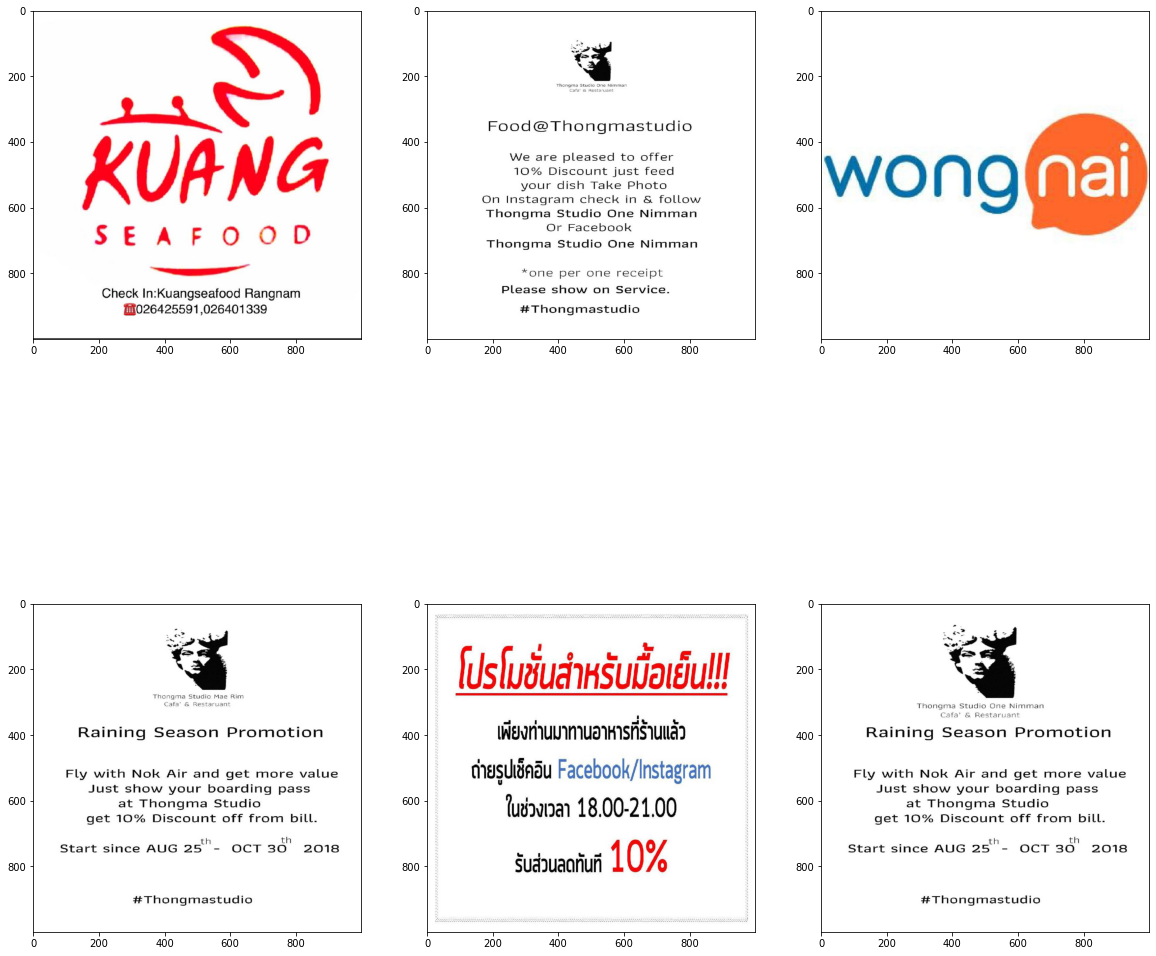

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
###has high red
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for imag in water['Pic']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    imag = os.path.join(train_data_dir, imag)
    img = Image.open(imag)
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

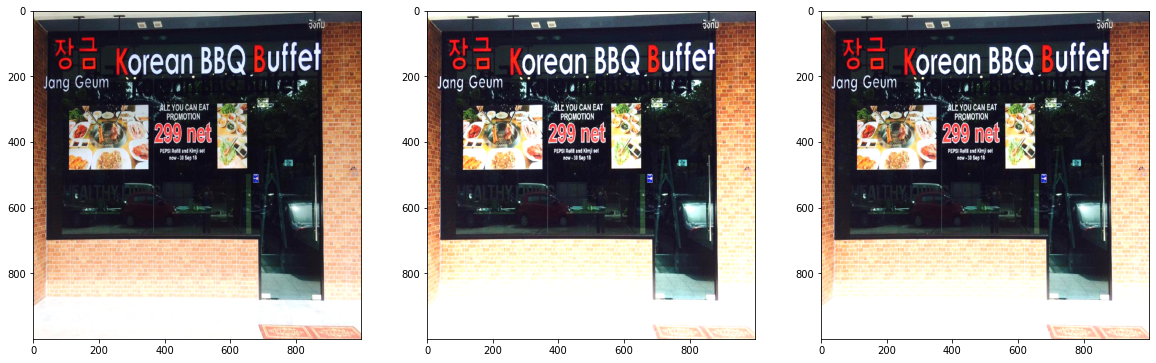

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
# example of horizontal shift image augmentation

##brightness
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
img = load_img( os.path.join(train_data_dir, water['Pic'][1061]) )
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0.5,2])
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

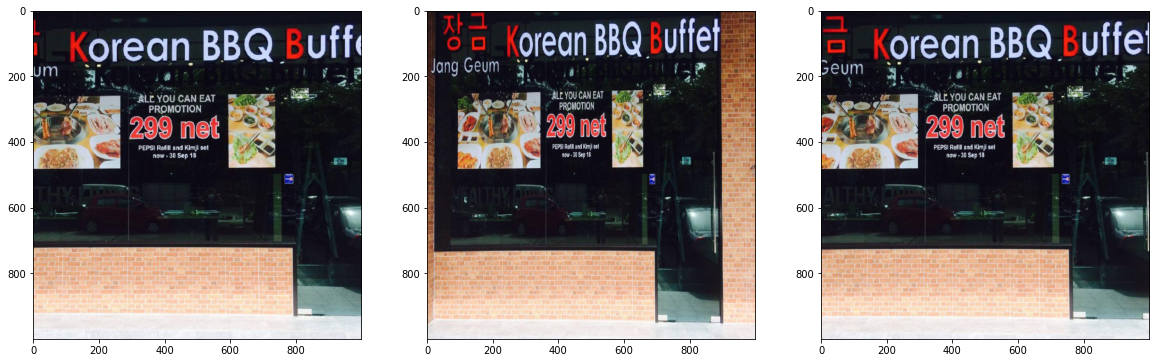

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
##Zoom

img = load_img( os.path.join(train_data_dir, water['Pic'][1061]) )
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[0.5, 1.0])
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

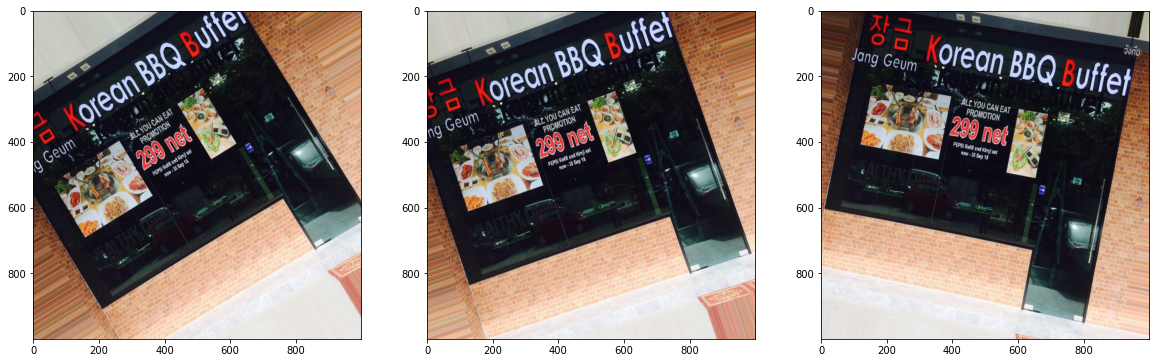

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
##rotation

img = load_img( os.path.join(train_data_dir, water['Pic'][1061]) )
data = img_to_array(img)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(rotation_range=35)
it = datagen.flow(samples, batch_size=1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
for i in range(3):
    fig = plt.figure()
    batch = it.next()
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
pyplot.show()

In [ ]:
####Data augment feature
datagentrain = ImageDataGenerator(rotation_range=35, 
                                 zoom_range=[0.5, 1.0], 
                                 brightness_range=[0.5,2])

datagen = ImageDataGenerator()

train = datagentrain.flow_from_directory('train/')
test = datagen.flow_from_directory('test/')
val = datagen.flow_from_directory('val/')

Found 1520 images belonging to 2 classes.
Found 316 images belonging to 2 classes.
Found 269 images belonging to 2 classes.


In [ ]:
model = build()
history = model.fit_generator(train, epochs= 20, validation_data=val)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 255, 255, 32)      416       
_________________________________________________________________
batch_normalization (BatchNo (None, 255, 255, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 64)        8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 84, 84, 64)        2

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/20
48/48 [==============================] - 82s 1s/step - loss: 0.9443 - acc: 0.5059 - val_loss: 1.5706 - val_acc: 0.5093
Epoch 2/20
48/48 [==============================] - 51s 1s/step - loss: 0.8186 - acc: 0.5625 - val_loss: 0.8324 - val_acc: 0.4944
Epoch 3/20
48/48 [==============================] - 51s 1s/step - loss: 0.8023 - acc: 0.5480 - val_loss: 0.8333 - val_acc: 0.5130
Epoch 4/20
48/48 [==============================] - 51s 1s/step - loss: 0.7704 - acc: 0.5816 - val_loss: 0.8122 - val_acc: 0.5390
Epoch 5/20
48/48 [==============================] - 51s 1s/step - loss: 0.7864 - acc: 0.5474 - val_loss: 0.9539 - val_acc: 0.5056
Epoch 6/20
48/48 [==============================] - 51s 1s/step - loss: 0.8011 - acc: 0.5507 - val_loss: 0.8384 - val_acc: 0.5576
Epoch 7/20
48/48 [==============================] - 51s 1s/step - loss: 0.7830 - acc: 0.5697 - val_loss: 0.7372 - val_acc: 0.5242
Epoch 8/20
48/48 [==============================] - 51s 1s/step - loss: 0.7631 - acc: 0.55

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

predict_frame = pd.DataFrame([])
predict = model.predict_generator(test)
predict_frame['category'] = np.argmax(predict, axis=-1)
labels = dict((v,k) for k,v in val.class_indices.items())
predict_frame['category'] = predict_frame['category'].replace(labels)
print(classification_report(y_test, predict_frame['category'].astype(int)))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



              precision    recall  f1-score   support

           0       0.52      0.55      0.54       159
           1       0.52      0.49      0.50       157

    accuracy                           0.52       316
   macro avg       0.52      0.52      0.52       316
weighted avg       0.52      0.52      0.52       316



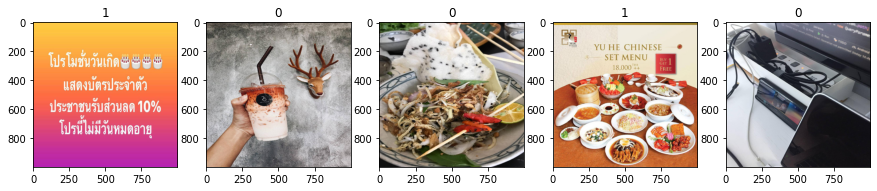

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
show_wrong_classification(y_test, predict_frame['category'].astype(int), df_train)

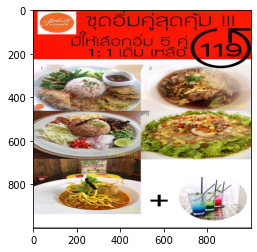

In [ ]:
plt.imshow(i)
plt.show()

In [ ]:
i = 0
j = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
for imag in water['images']:
    if i == 1 and j ==3:
        break
    if j > 2:
        i =1
        j = 0
    img = Image.open(imag)
    fig = plt.figure()
    ax[i][j].imshow(img)
    j+=1

In [ ]:
uploaded = files.upload()

Saving 1NWL9mqJ9EuoEeuumxRY5osW1rhkSd.jpg to 1NWL9mqJ9EuoEeuumxRY5osW1rhkSd.jpg


In [ ]:
uploaded['1NWL9mqJ9EuoEeuumxRY5osW1rhkSd.jpg']


/bin/bash: [picture]uploaded[1NWL9mqJ9EuoEeuumxRY5osW1rhkSd.jpg]: command not found


In [ ]:
uploaded

{'1NWL9mqJ9EuoEeuumxRY5osW1rhkSd.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03\xe8\x03\xe8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\x

In [ ]:
def extractimagefeat(query):
  #create folder
  foldername = 'images/'+query
  isdir = os.path.isdir(foldername) 
  #check if folder exist
  if not isdir:
    #create directory
    os.makedirs(foldername)
  #get images from google search
  imglist = sc.get_image_urls(query,30)
  i = 1
  for img in imglist[0:30]:
    #extract image features from each images and save to files
    try:
      print(i)
      #create image path
      savepath = foldername + '/' + str(i)+'.p'
      a = cv.image(img)
      a.getresnet50()
      #a.getmobilenet()
      #a.getmobilenet()
      a.save(savepath)
      i = i + 1
    except:
      pass
  return 'complete'

In [ ]:
import os

In [ ]:
import glob
import pandas as pd
import pickle
def createdataset(clsList):
  #imgfolder = glob.glob('images/*')
  dataset = []
  for cls in clsList:
    clsset = pd.DataFrame()
    pList = glob.glob('images/'+cls+'/*')
    featvec = []
    for p in pList:
      dat = pickle.load(open(p,'rb'))
      featvec.append(dat.resnet50)
    clsset['feature'] = featvec
    cls = cls.split('/')[-1]
    clsset['label'] = cls
    dataset.append(clsset)
  return pd.concat(dataset,axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
def trainmodel(dataset,modfile=''):
  trainfeat, testfeat, trainlabel, testlabel = train_test_split(dataset['feature'], dataset['label'], test_size=0.20, random_state=0)
  clf = LinearSVC()
  mod = clf.fit(np.vstack(trainfeat.values),trainlabel.values)
  res = mod.predict(np.vstack(testfeat.values))
  if modfile!='':
    pickle.dump(mod,open(modfile,'wb'))
  acc = sum(res == testlabel)/len(res)
  return mod,acc

In [ ]:
def createclassifier(clsList,modfile):
  for c in clsList:
    extractimagefeat(c)
  dset = createdataset(clsList)
  return trainmodel(dset,modfile)

In [ ]:
createclassifier(['ส้มโอ','ส้มเช้ง','ส้มสายน้ำผึ้ง'],'ส้ม.mod')

In [ ]:
# output function
modFile = 'ส้ม.mod'
mod = pickle.load(open(modFile,'rb'))

In [ ]:
def predicting(imgurl):
  a = cv.image(imgurl)
  feat = a.getresnet50()
  res = mod.predict([feat])
  return res

### Object recognition

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
# K.set_image_dim_ordering('tf')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.optimizers import SGD,RMSprop,adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [ ]:
uploaded = files.upload()

Saving test_segment_pic.zip to test_segment_pic.zip


In [ ]:
data = zipfile.ZipFile(io.BytesIO(uploaded['test_segment_pic.zip']), 'r')
data.extractall()

In [ ]:
data.printdir()

File Name                                             Modified             Size
test_segment_pic/alcohol_bottle/               2021-11-01 18:48:06            0
test_segment_pic/alcohol_bottle/1.jpg          2021-11-01 18:33:52         6594
test_segment_pic/alcohol_bottle/10.jpg         2021-11-01 18:36:04        13099
test_segment_pic/alcohol_bottle/11.jpg         2021-11-01 18:36:16         9761
test_segment_pic/alcohol_bottle/12.jpg         2021-11-01 18:36:24         8882
test_segment_pic/alcohol_bottle/13.jpg         2021-11-01 18:36:32         4881
test_segment_pic/alcohol_bottle/14.jpg         2021-11-01 18:36:40        10266
test_segment_pic/alcohol_bottle/15.jpg         2021-11-01 18:36:50         7332
test_segment_pic/alcohol_bottle/16.jpg         2021-11-01 18:36:58        10978
test_segment_pic/alcohol_bottle/17.jpg         2021-11-01 18:37:04         6213
test_segment_pic/alcohol_bottle/18.jpg         2021-11-01 18:37:14        12151
test_segment_pic/alcohol_bottle/19.jpg  

In [ ]:
train_data_dir = 'test_segment_pic/'
data_dir_list = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])

In [ ]:
data_dir_list

['alcohol_bottle',
 'pure_drink',
 'pure_food',
 'cap_screen',
 'store_front',
 'promo_pic',
 'human']

In [ ]:
nb_train_samples

526

In [ ]:
img_rows=512
img_cols=512
num_channel= 3 #1
num_epoch= 200
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
	img_list=os.listdir('test_segment_pic/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread('test_segment_pic/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB) #cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2GRAY, cv2.COLOR_BGR2HSV
		input_img_resize=cv2.resize(input_img,(512,512))
		img_data_list.append(input_img_resize)
		

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 1023
print (img_data.shape)

Loaded the images of dataset-alcohol_bottle

Loaded the images of dataset-pure_drink

Loaded the images of dataset-pure_food

Loaded the images of dataset-cap_screen

Loaded the images of dataset-store_front

Loaded the images of dataset-promo_pic

Loaded the images of dataset-human

(526, 512, 512, 3)


In [ ]:
import keras
from keras import backend as K
K.image_data_format()

'channels_last'

In [ ]:
if num_channel==1:
	if K.image_data_format()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=3) 
		print (img_data.shape)
		
else:
	if K.image_data_format()=='th':
		img_data=np.rollaxis(img_data,4,1)
		print (img_data.shape)

In [ ]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [ ]:
len(labels)

526

In [ ]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:88]=0
labels[88:176]=1
labels[176:200]=2
labels[200:302]=3
labels[302:368]=4
labels[368:472]=5
labels[472:526]=6

#names = ['human', 'promo_pic', 'alcohol_bottle']
names = ['alcohol_bottle','human','cap_screen','pure_food','store_front','promo_pic','pure_drink']

In [ ]:
Y = np_utils.to_categorical(labels, num_classes)

In [ ]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [ ]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (473, 512, 512, 3)
X_test shape = (53, 512, 512, 3)


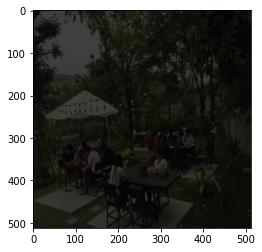

In [ ]:
image = X_train[103,:] #.reshape((128,128))
plt.imshow(image)
plt.show()

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Lambda
# from keras.preprocessing.image import ImageDataGenerator

# def build():
#     model = Sequential()
#     IMAGE_WIDTH = 256
#     IMAGE_HEIGHT = 256
#     IMAGE_CHANNELS = 3
#     model.add(Lambda(lambda x: x, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
#     model.add(Conv2D(32, (2, 2), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(3, 3)))
#     model.add(Dropout(0.4))

#     model.add(Conv2D(64, (2, 2), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(3, 3)))
#     model.add(Dropout(0.4))

#     model.add(Conv2D(128, (2, 2), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(3, 3)))
#     model.add(Dropout(0.4))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(2, activation='softmax')) 

#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#     model.summary()
#     return model

In [ ]:
input_shape=img_data[0].shape

In [ ]:
input_shape

(512, 512, 3)

In [ ]:
#Initialising the input shape
input_shape=img_data[0].shape
# Design the CNN Sequential model
cnn_model = Sequential([
    Convolution2D(64,2,2, padding ='same',activation='relu',input_shape = input_shape),
    Convolution2D(64,2,2,activation='relu'),
    MaxPooling2D(pool_size=(3,3)) ,
    Dropout(0.563), #0.55 -> 0.563

    Convolution2D(256,2,2, padding ='same',activation='relu',input_shape = input_shape),
    Convolution2D(256,2,2,activation='relu'),
    MaxPooling2D(pool_size=(3,3)) ,
    Dropout(0.57),

    Flatten(), 
    Dense(1024,activation='relu'),
    Dropout(0.61), #-> 0.61
    Dense(7,activation = 'softmax')
])

In [ ]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      832       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 42, 42, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 256)       65792     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 256)       262400    
                                                      

In [ ]:
hist = cnn_model.fit(X_train, y_train, batch_size= 9 , epochs = 90 , verbose=1, validation_data=(X_test, y_test)) #batch size 9
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

Epoch 1/90
53/53 [==============================] - 42s 787ms/step - loss: 1.9074 - accuracy: 0.1691 - val_loss: 1.8641 - val_accuracy: 0.2830
Epoch 2/90
53/53 [==============================] - 42s 785ms/step - loss: 1.8921 - accuracy: 0.1924 - val_loss: 1.9015 - val_accuracy: 0.1887
Epoch 3/90
53/53 [==============================] - 40s 760ms/step - loss: 1.8885 - accuracy: 0.1776 - val_loss: 1.8675 - val_accuracy: 0.1887
Epoch 4/90
53/53 [==============================] - 42s 787ms/step - loss: 1.8803 - accuracy: 0.2030 - val_loss: 1.8765 - val_accuracy: 0.2075
Epoch 5/90
53/53 [==============================] - 42s 787ms/step - loss: 1.8641 - accuracy: 0.2030 - val_loss: 1.8578 - val_accuracy: 0.1887
Epoch 6/90
53/53 [==============================] - 40s 763ms/step - loss: 1.8276 - accuracy: 0.2579 - val_loss: 1.7887 - val_accuracy: 0.3396
Epoch 7/90
53/53 [==============================] - 40s 761ms/step - loss: 1.8268 - accuracy: 0.2368 - val_loss: 1.8934 - val_accuracy: 0.1509

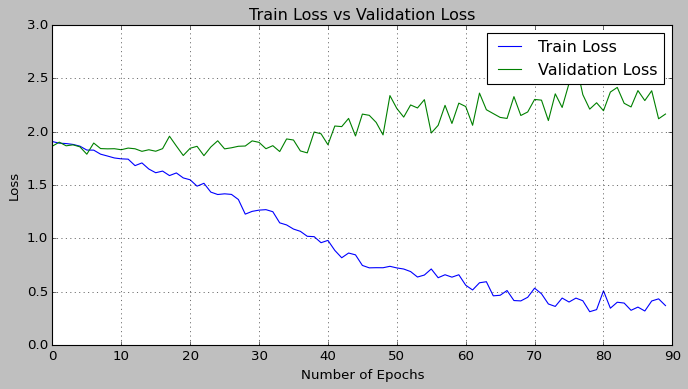

In [ ]:
##0.37
xc=range(90)
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])

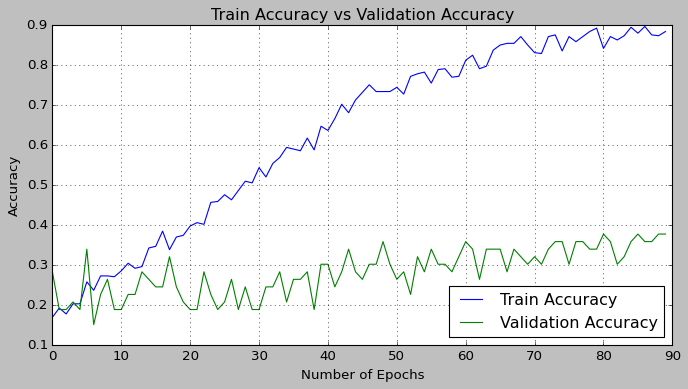

In [ ]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)
plt.style.use(['classic'])

In [ ]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 2.1653201580047607
Test Accuracy: 0.37735849618911743


In [ ]:
# ['human', 'promo_pic', 'alcohol_bottle']
test_image = X_test[11:12]
print (test_image.shape)
print(cnn_model.predict(test_image))
print(y_test[11:12])


(1, 512, 512, 3)
[[0.00345091 0.92209285 0.00384425 0.06228845 0.00285909 0.00187766
  0.00358673]]
[[0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
# image = test_image.reshape((128,128))
# plt.imshow(image)
# plt.show()

In [ ]:
Y_pred = cnn_model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)
target_names=['alcohol_bottle','human','cap_screen','pure_food','store_front','promo_pic','pure_drink']
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_names))


[[1.81300379e-03 2.31717040e-05 2.96605123e-08 2.68077888e-02
  8.27237189e-01 1.44109875e-01 8.89182957e-06]
 [5.14696687e-02 5.49695075e-01 1.30989656e-01 1.98711410e-01
  4.30656923e-03 4.51016501e-02 1.97259896e-02]
 [6.43676892e-03 9.06381011e-02 1.26469438e-03 8.93168747e-01
  1.36851473e-03 6.92341011e-03 1.99704678e-04]
 [1.04862993e-04 7.43912816e-01 1.78254638e-02 5.41946106e-02
  5.37537038e-02 4.74887947e-03 1.25459671e-01]
 [1.62928596e-01 7.02288896e-02 3.16206254e-02 1.08113334e-01
  5.23638874e-02 2.75153786e-01 2.99590915e-01]
 [6.43149531e-03 4.63507697e-03 9.31010698e-04 1.12459652e-01
  7.93025732e-01 5.80675602e-02 2.44494826e-02]
 [3.76299620e-02 2.51085997e-01 3.47406194e-02 5.46609402e-01
  4.24877880e-03 3.17080021e-02 9.39772576e-02]
 [9.99788940e-01 4.25256985e-08 2.16594276e-09 2.98160444e-07
  2.74077479e-07 1.91315863e-04 1.91530817e-05]
 [7.08778262e-01 1.38351488e-05 1.71554916e-07 6.11002417e-03
  1.81384057e-01 1.03642933e-01 7.07352738e-05]
 [1.055675

In [ ]:
with open('cnn_model_lmwn.pkl', 'wb') as pickle_out:
     pickle.dump(cnn_model, pickle_out)

INFO:tensorflow:Assets written to: ram://39cc6e08-c460-40ba-876c-eacf53700fcd/assets


In [ ]:
from google.colab import files
files.download('cnn_model_lmwn.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow import keras
cnn_model.save('cnn_model_lmwn.h5') 

In [ ]:
files.download('cnn_model_lmwn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix with Normalization")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Confusion matrix without normalization
[[6 2 0 0 0 0 0]
 [0 4 0 2 0 0 0]
 [1 0 0 2 0 0 0]
 [3 2 0 3 6 0 1]
 [0 0 0 3 3 1 0]
 [0 0 0 2 3 3 2]
 [2 1 0 0 0 0 1]]


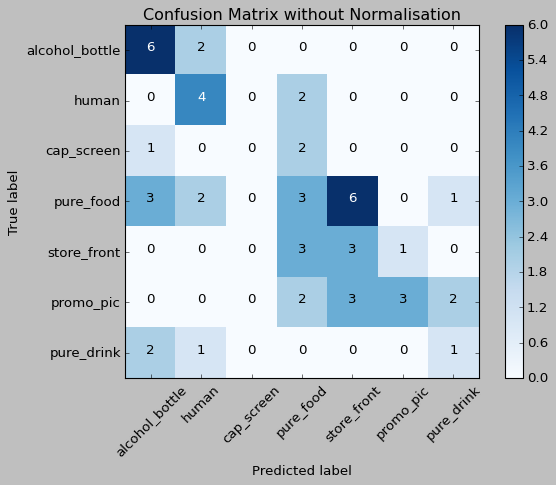

In [ ]:
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion Matrix without Normalisation')
plt.show()

In [ ]:
####เอาพวกนี้แหละ ไปเป็น feature

cnn_model.predict(X_test[5:6])

array([[2.36e-03, 2.85e-01, 1.41e-03, 2.23e-01, 8.91e-02, 3.99e-01,
        4.90e-05]], dtype=float32)

In [ ]:
img_data_score = cnn_model.predict(img_data)

In [ ]:
df_img_data_score = pd.DataFrame(img_data_score, columns =['alcohol_bottle','human','cap_screen','pure_food','store_front','promo_pic','pure_drink']) 

In [ ]:
# df_img_data_score

In [ ]:
image_code_list = []
for i in data_dir_list:
  img_list=os.listdir('test_segment_pic/'+ i)
  for j in img_list:
    image_code_list.append(j)

df_img_code = pd.DataFrame(image_code_list, columns =['img_code']) 

pd.concat([df_img_code, df_img_data_score],  axis=1)

In [ ]:
# df_img_code = pd.DataFrame(image_code_list, columns =['img_code']) 

In [ ]:
# pd.concat([df_img_code, df_img_data_score],  axis=1)

img_code  ...  Class 2 (alcohol)
0                                37.jpg  ...       4.528624e-01
1    1NWLCDYQfqDEWFZtAxwa6yQIOZmzvu.jpg  ...       5.639390e-12
2                                33.jpg  ...       1.793265e-01
3                                 9.jpg  ...       6.462350e-01
4                                13.jpg  ...       4.226007e-03
..                                  ...  ...                ...
275  1NWLCXct5lq3mEicb6JVrFytfHIAlW.jpg  ...       9.993128e-01
276  1NWLCX5sISGgtK1lP16nE6I6AIZWTr.jpg  ...       9.998110e-01
277  1NWLBkMxZEU3pEzRCiUc996pPTVK0U.jpg  ...       9.997063e-01
278                               4.jpg  ...       9.099008e-01
279                              20.jpg  ...       9.637858e-01

[280 rows x 4 columns]

In [ ]:
###สร้าง dataframe จาก Xtest map with  image_code

## วันหลังมาทำต่อ 
### 1) เป็น promo_pic, Alcohol_pic(either bottle or whatever), Human, Capture screen, And หน้าร้าน, แก้วกาแฟโง่ๆ pure coffee, pure food Approved
### 2) เติมรูปจาก google ให้ครบร้อย  Approved
### 3) ลองปรับ scale 128 -> 256 -> 512, max pooling 1,2,3 Approved
### 4) ไปเอา model 3 layer ตอน pokemon มาใช้ ตอนนี้แม่ง layer เดียวเอง Approved
### 4.5) เปลี่ยนสีที่ไม่ใช่ convert color BGRgray,RGB,HSV  Approved
### 4.7) num_chan = 1,2,3 Approved
### 5) Acc ดีกว่า random sampling ใน test, train, validation ซัก 10% ถือว่าผ่าน Approved +30% in train almost 100%


### 6) เอาไปรัน map กับรูปใน train & test สร้าง feature
### 7) string feture ซัก 10 คำเด็ด
### 8) XGB ดู accuracy

```
# This is formatted as code
```




In [ ]:
df_train['Pic'][2104]

'1NWLBEnU3EMnAZNhFyRQQj9WgmEuyy.jpg'

In [ ]:
uploaded = files.upload()

###cnn_model_lmwn.pkl 
###cnn_model_lmwn.pkl

Saving cnn_model_lmwn.pkl to cnn_model_lmwn.pkl


In [ ]:
with open('cnn_model_lmwn.pkl', 'rb') as pickle_in_2:
     cnn_model = pickle.load(pickle_in_2)

In [ ]:

img_rows=512
img_cols=512
num_classes = 7
round = 1

df_pred_img_stack = pd.DataFrame(columns = ['Pic','alcohol_bottle','human','cap_screen','pure_food','store_front','promo_pic','pure_drink'])

while round <= 22:
  min = 100*(round-1)
  if round < 22:
    max = 100*round
  else:
    max = 2105
  img_data_list=[]
  pic_id_data_list = []
  for i in range(min,max):
    input_img=cv2.imread('training_images/'+ df_train['Pic'][i] )
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB) #cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2GRAY, cv2.COLOR_BGR2HSV
    input_img_resize=cv2.resize(input_img,(512,512))
    img_data_list.append(input_img_resize)
    pic_id_data_list.append(df_train['Pic'][i])

  img_data_train = np.array(img_data_list)
  img_data_train = img_data_train.astype('float32')
  img_data_train /= 1023

  num_channel= 3

  if num_channel==1:
    if K.image_data_format()=='th':
      img_data_train= np.expand_dims(img_data_train, axis=1) 
      print (img_data_train.shape)
    else:
      img_data_train= np.expand_dims(img_data_train, axis=3) 
      print (img_data_train.shape)
      
  else:
    if K.image_data_format()=='th':
      img_data_train=np.rollaxis(img_data_train,4,1)
      print (img_data_train.shape)
    
  train_img_data_score = cnn_model.predict(img_data_train)
  df_img_data_score = pd.DataFrame(train_img_data_score, columns =['alcohol_bottle','human','cap_screen','pure_food','store_front','promo_pic','pure_drink']) 

  df_img_code = pd.DataFrame(pic_id_data_list, columns =['Pic']) 
  image_feat_train = pd.concat([df_img_code, df_img_data_score],  axis=1)

  df_pred_img_stack = pd.concat([df_pred_img_stack,image_feat_train],ignore_index=True)
  round = round+1

In [ ]:
len(df_pred_img_stack)

2105

In [ ]:
df_train = df_train.merge(df_pred_img_stack, on="Pic", how='left')

In [ ]:
df_train

PromotionId  ... pure_drink
0     1NWLAzBwCUadj2dLNYVrTib3XuTL0T  ...   0.002481
1     1NWLD3dp7tdq34WkgzQGLiPQM7dFC5  ...   0.000545
2     1NWLCHgnVeBb2TIup13b1RSOLOl3Cq  ...   0.002184
3     1NWLC9rEila7y7EyYKPp17zCMkjHs2  ...   0.998996
4     1NWLCUe1qEBZtZEwInmjdBoce8XBF2  ...   0.012852
...                              ...  ...        ...
2100  1NWL9v9ua9oLaFs779duFoI9ft0fga  ...   0.017971
2101  1NWLBrPfc24ETTz9QzE8Ve51n6jigw  ...   0.001264
2102  1NWLBCWHKnRCd94ttE5Ax5L1fYKaTE  ...   0.000583
2103  1NWLCG2dgzDFbbPtmjzv4n1GyNgdnb  ...   0.000094
2104  1NWLBEnU3EMnAZNhFyRQQj9WgmEuyy  ...   0.000040

[2105 rows x 11 columns]

In [ ]:
#### create text  Poomjai sus


#### ลอง random forest ดูต่อ

In [ ]:
# #training_images_small_bash/1NWL9mqJ9EuoEeuumxRY5osW1rhkSd.jpg

# img_rows=512
# img_cols=512
# # num_channel= 3 #1
# # num_epoch= 200
# # Define the number of classes
# num_classes = 7
# img_data_list=[]

# img_list=os.listdir('training_images_small_bash')

# for img in img_list:
# 	input_img=cv2.imread('training_images_small_bash/'+ img )
# 	input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB) #cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2GRAY, cv2.COLOR_BGR2HSV
# 	input_img_resize=cv2.resize(input_img,(512,512))
# 	img_data_list.append(input_img_resize)

# # img_data = np.array(img_data_list)
# # img_data = img_data.astype('float32')
# # img_data /= 511
# # print (img_data.shape)

In [ ]:
# len(img_data_list)

198

In [ ]:
# img_data_train = np.array(img_data_list)
# img_data_train = img_data_train.astype('float32')
# img_data_train /= 1023
# print (img_data_train.shape)

(198, 512, 512, 3)


In [ ]:
# import keras
# from keras import backend as K
# K.image_data_format()

'channels_last'

In [ ]:
# num_channel= 3

# if num_channel==1:
# 	if K.image_data_format()=='th':
# 		img_data_train= np.expand_dims(img_data_train, axis=1) 
# 		print (img_data_train.shape)
# 	else:
# 		img_data_train= np.expand_dims(img_data_train, axis=3) 
# 		print (img_data_train.shape)
		
# else:
# 	if K.image_data_format()=='th':
# 		img_data_train=np.rollaxis(img_data_train,4,1)
# 		print (img_data_train.shape)

In [ ]:
# train_img_data_score = cnn_model.predict(img_data_train)

In [ ]:
# df_img_data_score = pd.DataFrame(train_img_data_score, columns =['Class 0 (human)', 'Class 1 (promo)', 'Class 2 (alcohol)']) 

In [ ]:
# image_code_list = []

# img_list=os.listdir('training_images_small_bash/')
# for j in img_list:
#   image_code_list.append(j)

# df_img_code = pd.DataFrame(image_code_list, columns =['img_code']) 

# image_feat_train = pd.concat([df_img_code, df_img_data_score],  axis=1)

In [ ]:
# len(image_code_list)

198

In [ ]:
# image_feat_train

### 200 pic ไม่มีปัญหาใช้แรมครึ่งนึง ที่เหลือคือวนลูป แทนที่ตัวแปรเดิม stack ละเอาไป join df_train

In [ ]:
# df_train = df_train.merge(image_feat_train, left_on='Pic', right_on='img_code', how='left')

In [ ]:
# df_train[df_train['Class 1 (promo)']>0]

PromotionId  ... Class 2 (alcohol)
37    1NWLA7pDgz3QEyKvMswAWtXVzcI9Ra  ...          0.038468
48    1NWL9t3LOvQZXxyyPd075XKGpgLJrz  ...          0.217639
58    1NWL9rsO4XMxedV39W6CK3khlLiH9m  ...          0.333149
63    1NWLAaYCXNPGSwX0siz41aQyRoYOS4  ...          0.001793
71    1NWLA4Br5kbYb1BxDfaOtQ17ONo7Kc  ...          0.000004
...                              ...  ...               ...
2044  1NWLA0YbXMmFuNmMtoAqgBST4pNnMH  ...          0.183402
2055  1NWL9sYBnBBPypHze7pb08LHzjLlQD  ...          0.673133
2079  1NWL9qh7A7u82JFUBRpjnfmpDTFC1H  ...          0.005686
2087  1NWLA5BZdx2OH9wLaIwfKO7izR8UfB  ...          0.849011
2100  1NWL9v9ua9oLaFs779duFoI9ft0fga  ...          0.014730

[198 rows x 8 columns]

In [ ]:
# img_data_list --> image url + feature

image data คือ feature รูปของ training set เอามา map 

In [ ]:
# df_train['Pic'] = df_train['PromotionId']+'.jpg'


# for imag in df_train['Pic']:
#     img = Image.open(os.path.join('training_images/', imag))


## Text feature

In [ ]:
df_train

PromotionId  ... pure_drink
0     1NWLAzBwCUadj2dLNYVrTib3XuTL0T  ...   0.015335
1     1NWLD3dp7tdq34WkgzQGLiPQM7dFC5  ...   0.004682
2     1NWLCHgnVeBb2TIup13b1RSOLOl3Cq  ...   0.003553
3     1NWLC9rEila7y7EyYKPp17zCMkjHs2  ...   0.338078
4     1NWLCUe1qEBZtZEwInmjdBoce8XBF2  ...   0.005025
...                              ...  ...        ...
2100  1NWL9v9ua9oLaFs779duFoI9ft0fga  ...   0.010112
2101  1NWLBrPfc24ETTz9QzE8Ve51n6jigw  ...   0.275566
2102  1NWLBCWHKnRCd94ttE5Ax5L1fYKaTE  ...   0.003601
2103  1NWLCG2dgzDFbbPtmjzv4n1GyNgdnb  ...   0.019760
2104  1NWLBEnU3EMnAZNhFyRQQj9WgmEuyy  ...   0.075343

[2105 rows x 11 columns]

In [ ]:
df_train['description'] = df_train['description'].fillna('')

###clean word

punctuation = "!@#$^&*()_+<>?:.,;-"
for i in range(0,len(df_train)):
  for c in df_train['description'][i]:
    if c in punctuation:
      df_train['description'][i] = df_train['description'][i].replace(c, "")

###remove space n
for i in range(0,len(df_train)):
  if '\n' in df_train['description'][i]:
    df_train['description'][i] = df_train['description'][i].replace('\n','')

df_train['description'] = df_train['description'].str.lower()
df_train['des_length'] = df_train['description'].str.len()

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

try:
    %tensorflow_version 2.x
except:
    pass

# dev version
# !pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

# release version 
! pip install pythainlp

!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

import pythainlp

pythainlp.__version__

from pythainlp import sent_tokenize, word_tokenize

     |████████████████████████████████| 11.0 MB 29.0 MB/s 
     |████████████████████████████████| 743 kB 42.4 MB/s 
     |████████████████████████████████| 142 kB 22.5 MB/s 
     |████████████████████████████████| 72 kB 423 kB/s 
     |████████████████████████████████| 1.2 MB 38.8 MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10765 sha256=8975d2aeff531e6b6240194e81a1375487ba3d71ae671c780701bed5a8169f32
  Stored in directory: /root/.cache/pip/wheels/1a/f4/8a/a5024fb77b32ed369e5c409081e5f00fbe3b92fdad653f6e69
Successfully built unicodecsv
     |████████████████████████████████| 2.0 MB 30.9 MB/s 
     |████████████████████████████████| 1.3 MB 31.8 MB/s 
     |████████████████████████████████| 473 kB 36.2 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size

In [ ]:
text = "เมืองเชียงรายมีประวัติศาสตร์อันยาวนาน        เป็นที่ตั้งของหิรัญนครเงินยางเชียงแสน"

In [ ]:
print("sent_tokenize:", sent_tokenize(text))
print("word_tokenize:", word_tokenize(text))
print("no whitespace:", word_tokenize(text, keep_whitespace=False))

sent_tokenize: ['เมืองเชียงรายมีประวัติศาสตร์อันยาวนาน        เป็นที่ตั้งของหิรัญนครเงินยางเชียงแสน']
word_tokenize: ['เมือง', 'เชียงราย', 'มี', 'ประวัติศาสตร์', 'อัน', 'ยาวนาน', '        ', 'เป็นที่ตั้ง', 'ของ', 'หิรัญ', 'นคร', 'เงิน', 'ยาง', 'เชียงแสน']
no whitespace: ['เมือง', 'เชียงราย', 'มี', 'ประวัติศาสตร์', 'อัน', 'ยาวนาน', 'เป็นที่ตั้ง', 'ของ', 'หิรัญ', 'นคร', 'เงิน', 'ยาง', 'เชียงแสน']


In [ ]:
word_tokenize(df_train['description'][1], keep_whitespace=False)

['ทะเล',
 'ทะลัก',
 'สุดยอด',
 'บุฟเฟ่ต์',
 'ทะเล',
 'ที่',
 'คุณ',
 'ไม่',
 'ควร',
 'พลาด',
 'ลด',
 'สูงสุด',
 '60',
 '%',
 'จาก',
 'ราคา',
 '1900',
 'บาท',
 'สุทธิ',
 'จอง',
 'เลย',
 'วัน',
 'ศุกร์',
 'และ',
 'วัน',
 'เสาร์',
 'ตั้งแต่',
 'เวลา',
 '1800',
 '-',
 '2200',
 'นรา',
 'คา',
 'นี้',
 'รวม',
 'ชา',
 'กาแฟร้อน',
 'ไม่',
 'อั้น',
 'น้ำอัดลม',
 'สมาชิก',
 'แอคคอร์',
 'พลัส',
 'รับ',
 'ส่วนลด',
 'ออน',
 'ท็อป',
 'อีก',
 '10',
 '%']

In [ ]:
####create bag of word
bag_of_word = []
for i in range(0,len(df_train)):
  new_word = word_tokenize(df_train['description'][i], keep_whitespace=False)
  bag_of_word = bag_of_word + new_word


In [ ]:
from collections import OrderedDict

bag_of_word_unique = list(OrderedDict.fromkeys(bag_of_word))

In [ ]:
len(bag_of_word)

37957

In [ ]:
len(bag_of_word_unique)

5332

In [ ]:
###count word
bow_len_list = []
for i in bag_of_word_unique:
  count = 0
  for j in bag_of_word:
    if i == j:
      count = count+1
  bow_len_list.append(count)


In [ ]:
df_word_len = pd.DataFrame(list(zip(bag_of_word_unique, bow_len_list)), columns = ['word', 'len'])

In [ ]:
df_word_len.sort_values(by='len', ascending=False).head(60)

word  len
36              -  593
25            บาท  591
70              1  557
8             ที่  443
23           ราคา  371
67            ฟรี  368
49            รับ  343
31            และ  342
91           ร้าน  326
21              %  319
135            มา  314
80      โปรโมชั่น  293
15            ไม่  252
62             ใน  249
125           กับ  241
89            ได้  239
154         เพียง  237
79           เมนู  235
54             10  227
18             ลด  226
318             /  226
40            นี้  209
75          พิเศษ  200
129          ซื้อ  199
176         อร่อย  184
153             2  181
443         อาหาร  176
76         สำหรับ  172
104      เท่านั้น  172
50         ส่วนลด  172
22            จาก  170
28            เลย  162
121             ๆ  159
68    เครื่องดื่ม  158
241            ไป  154
29            วัน  152
219           แถม  151
267             3  150
71           แก้ว  150
170           สุด  149
103           ทาน  146
139          สั่ง  143
92            ทุก  139
97             มี  138
213             น  137
269          หรือ  137
540        ลูกค้า  135
64          เมื่อ  134
447           ครบ  131
178             5  131
509           ชุด  128
229           ให้  127
1053         ท่าน  121
126         ทันที  119
546         เฉพาะ  119
202            ละ  118
93           สาขา  115
227             "  113
455             ฿  109
33        ตั้งแต่  107

In [ ]:
word_list_1 = ['ไฮเนเก้น','เบียร์','beer','cocktail','ค๊อกเทล','alcohol','wine','ไวน์','ขวด','กระป๋อง','แอลกอ','สิงห์','ช้าง','heineken','เหล้า','soju','โซจู','asahi','อาซาฮี','แก้ว','เหยือก','เย็น','น้ำแข็ง','singha','chang','lager','hop','rice','malt','เท่านั้น','ยกเว้น','คราฟ','craft','soda','โซดา','กับแกล้ม','ลด','แลก','แจก']
word_list_2 = ['promotion','free','discount','get','buy','buy5','ส่วนลด','ลดราคา','โปร','save','%','50','55','90','60','10','5','พิเศษ','แถม','สะสม','แสตมป์','แต้ม','ซื้อ','ปั่น','เพียง','ครบ','ทันที','โปรโมชั่น','โปรโมชัน','ชุด','ตั้งแต่','ให้','คูปอง','coupon','save','เซฟ','ประหยัด','like','comment','facebook','ไลค์','แชร์','share']
word_list_3 = ['เครื่องดื่ม','อร่อย','เมนู','ร้าน','อาหาร','percent','เปอร์เซ็นต์','เปอเซน','sale','coffee','ใหม่','ครบ','เฉพาะ','เมื่อ','เซต','คู่','เซตคู่','พนักงาน','ขึ้นไป','สุด','นี้','vip','robinhood','ฉลอง','เทศกาล','สาขา','วันเกิด','เปิด','จัดเต็ม','แนะนำ','เมนู','กิโล','ราคา','เริ่มต้น','เปิดตัว','collect','stamp','loyalty','point','รับ','โทร','ชุด','จับคู่','เช็คอิน','weekend']

In [ ]:
from collections import OrderedDict

word_list = word_list_1 + word_list_2 + word_list_3
word_list = list(OrderedDict.fromkeys(word_list))

###Text by Business sense, count text in Senstence

In [ ]:
for j in word_list:
  df_train[j] = 0
  for i in range(0,len(df_train)):
    df_train[j][i] = df_train['description'][i].count(j)


In [ ]:
df_train

PromotionId  ... weekend
0     1NWLAzBwCUadj2dLNYVrTib3XuTL0T  ...       0
1     1NWLD3dp7tdq34WkgzQGLiPQM7dFC5  ...       0
2     1NWLCHgnVeBb2TIup13b1RSOLOl3Cq  ...       0
3     1NWLC9rEila7y7EyYKPp17zCMkjHs2  ...       0
4     1NWLCUe1qEBZtZEwInmjdBoce8XBF2  ...       0
...                              ...  ...     ...
2100  1NWL9v9ua9oLaFs779duFoI9ft0fga  ...       0
2101  1NWLBrPfc24ETTz9QzE8Ve51n6jigw  ...       0
2102  1NWLBCWHKnRCd94ttE5Ax5L1fYKaTE  ...       0
2103  1NWLCG2dgzDFbbPtmjzv4n1GyNgdnb  ...       0
2104  1NWLBEnU3EMnAZNhFyRQQj9WgmEuyy  ...       0

[2105 rows x 115 columns]

In [ ]:
####export มาเก็บก่อน เผื่อ LGBM บึ้ม ยังมีจุดเซฟ
from google.colab import files
df_train.to_csv('df_train_lmwn_2.csv',encoding='utf-8-sig') 
files.download('df_train_lmwn_2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()
df_train = pd.read_csv(io.BytesIO(uploaded['df_train_lmwn_thai.csv']))

Saving df_train_lmwn_thai.csv to df_train_lmwn_thai (1).csv


### LGBM

In [ ]:
##choose X, Y 
all_feat = ['alcohol_bottle','human','cap_screen','pure_food','store_front','promo_pic','pure_drink','des_length'] + word_list
X = df_train[all_feat]
y = df_train['bad']

In [ ]:
###split df_train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier(num_leaves = 45 , max_bin = 100)
clf.fit(X_train, y_train)

LGBMClassifier(max_bin=100, num_leaves=45)

In [ ]:
# predict the results
y_pred=clf.predict(X_test)

In [ ]:
# view test set accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7753


In [ ]:
# view train set accuracy
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9994


In [ ]:
###threshold -> 0.8
###if low acc try increase max_bin,num_leaves, low running rate
###if overfit try decrease max_bin,num_leaves

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[133  40]
 [ 31 112]]

True Positives(TP) =  133

True Negatives(TN) =  112

False Positives(FP) =  40

False Negatives(FN) =  31


In [ ]:
# visualize confusion matrix with seaborn heatmap
import matplotlib.pyplot as plt

import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

TclError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       173
           1       0.74      0.78      0.76       143

    accuracy                           0.78       316
   macro avg       0.77      0.78      0.77       316
weighted avg       0.78      0.78      0.78       316



### Feature important

In [ ]:
importance = clf.feature_importances_

In [ ]:
importance

array([225, 264, 293, 290, 281, 219, 267, 262,   0,   0,   0,   0,   0,
         0,   0,   0,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  22,   0,   6,   0,   0,   0,   0,   0,   0,   0,  14,  16,
         0,   0,   0,   0,  20,   0,  31,   0,  45,   7,   3,   1,   0,
        29,  47,  26,  39,  37,   0,   0,  55,   0,  35,  24,  15,  28,
         0,  13,   2,   5,  11,  25,   4,  25,  15,   0,   0,   0,   0,
         0,   7,   4,  17,   0,   7,   0,   0,   7,   4,  22,   0,   0,
         6,   0,  14,  27,   5,   0,   0,   0,  15,   1,   0,   0,   0,
         0,   0,  46,   2,   0,   3,   0])

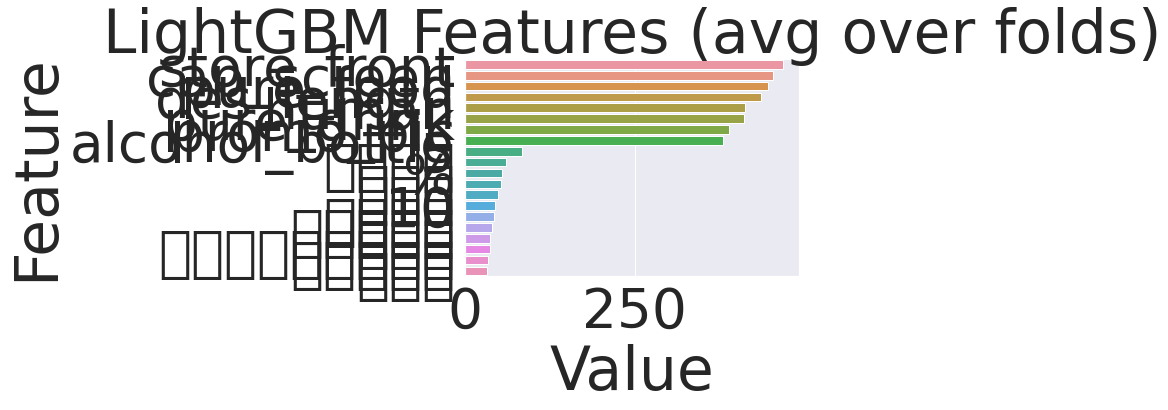

In [ ]:
def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure()
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

plotImp(clf, X , num = 20)

In [ ]:
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

     |████████████████████████████████| 34.0 MB 185 kB/s 
     |████████████████████████████████| 13.1 MB 13.8 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=6efb4cae6e57eb38aa6fea29e71ad90992c5942e0cf688b46ece3455c55251a8
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


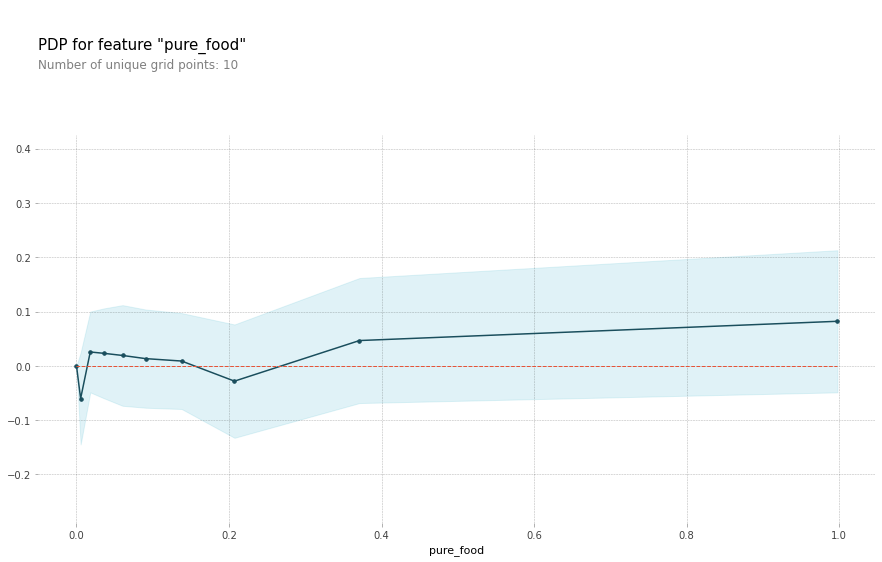

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model= clf , dataset= X , model_features= X.columns, feature='pure_food')

# plot it
pdp.pdp_plot(pdp_goals, 'pure_food')
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


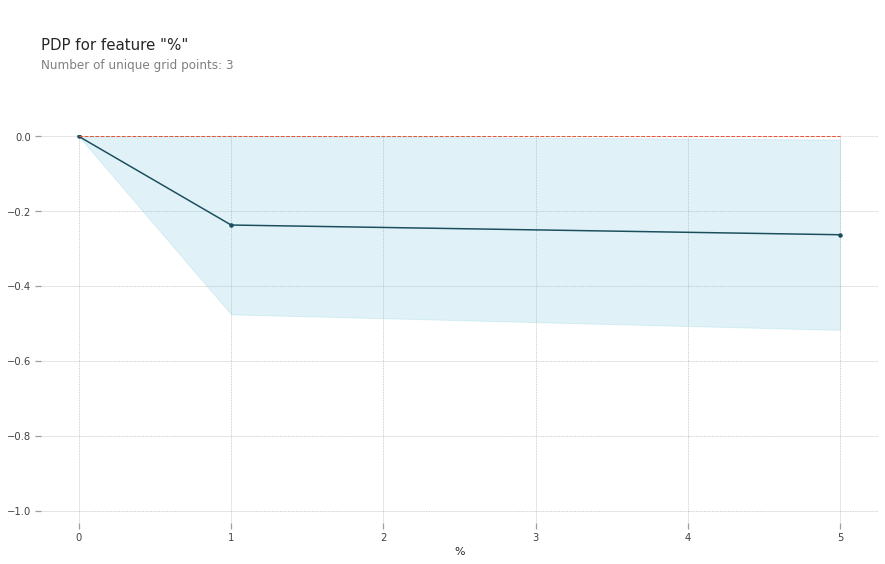

In [ ]:
pdp_goals = pdp.pdp_isolate(model= clf , dataset= X , model_features= X.columns, feature='%')

# plot it
pdp.pdp_plot(pdp_goals, '%')
plt.show()

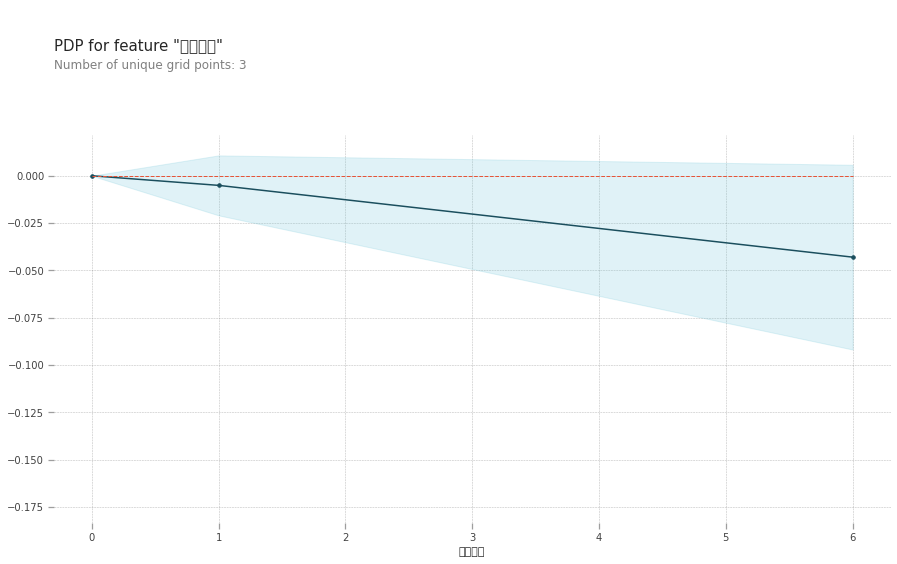

In [ ]:
pdp_goals = pdp.pdp_isolate(model= clf , dataset= X , model_features= X.columns, feature='ราคา')

# plot it
pdp.pdp_plot(pdp_goals, 'ราคา')
plt.show()

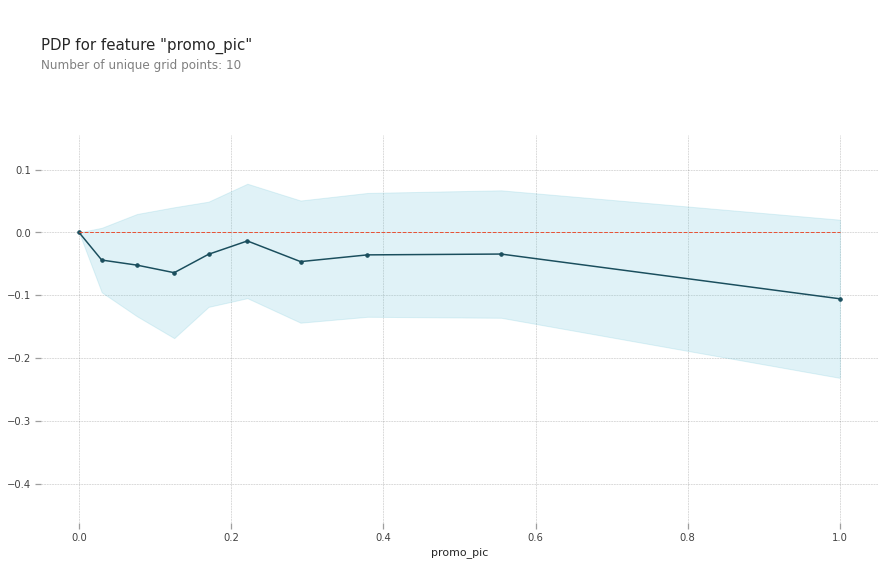

In [ ]:
pdp_goals = pdp.pdp_isolate(model= clf , dataset= X , model_features= X.columns, feature='promo_pic')

# plot it
pdp.pdp_plot(pdp_goals, 'promo_pic')
plt.show()

In [ ]:
import matplotlib as mpl
mpl.__version__  

'3.2.2'

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New', size = 13)

--2021-12-08 18:17:37--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-12-08 18:17:37--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.2’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2021-12-08 18:17:37 (5.48 MB/s) - 

In [ ]:
def font_name(filename):
  from matplotlib.ft2font import FT2Font
  font = FT2Font(filename)
  return font.family_name

### find similar promo from pic